A case study using iris dataset for KNN algorithm

In [18]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# training testing split
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

Use this command to help with choice of paramters in the KNeighborsClassifier function.

In [19]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy.

Training dataset size: 120
Testing dataset size: 30
Accuracy: 1.00


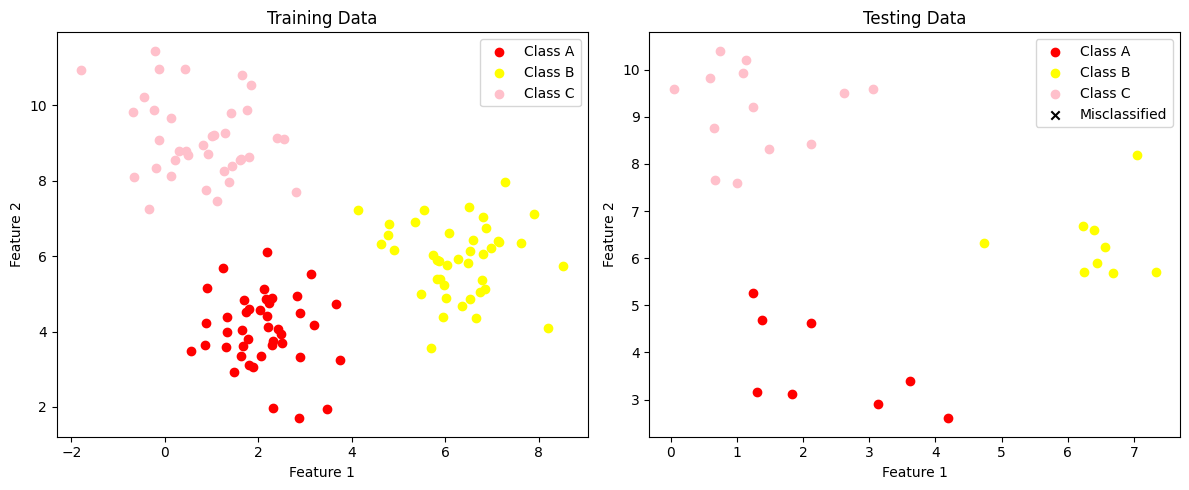

In [20]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)


# Installing the required libraries is optional; Colab comes with libraries already installed.
# scikit-learn matplotlib numpy!pip install

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating a synthetic dataset
centers = [[2, 4], [6, 6], [1, 9]]  # Locations of the blobs (3 classes)
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, centers=np.array(centers), random_state=1)

# Using a split of 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=50)

# The printing of the sizes of the datasets used for training and testing
print("Training dataset size:", len(X_train))
print("Testing dataset size:", len(X_test))

# Using k equal to eight, carry out a KNN analysis on the simulated data.
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


# Forecasting test results
y_predict = knn.predict(X_test)

# Score for output accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

# Results plotting
plt.figure(figsize=(12, 5))

# Plot the data for training
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='red', label='Class A')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='yellow', label='Class B')
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], c='pink', label='Class C')
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot the results of the experiments.
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='red', marker='o', label='Class A')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='yellow', marker='o', label='Class B')
plt.scatter(X_test[y_test == 2][:, 0], X_test[y_test == 2][:, 1], c='pink', marker='o', label='Class C')

# Mark incorrectly classified points
plt.scatter(X_test[y_predict != y_test][:, 0], X_test[y_predict != y_test][:, 1], c='black', marker='x', label='Misclassified')

plt.title('Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

Training dataset size: 120
Testing dataset size: 30
Accuracy: 1.00


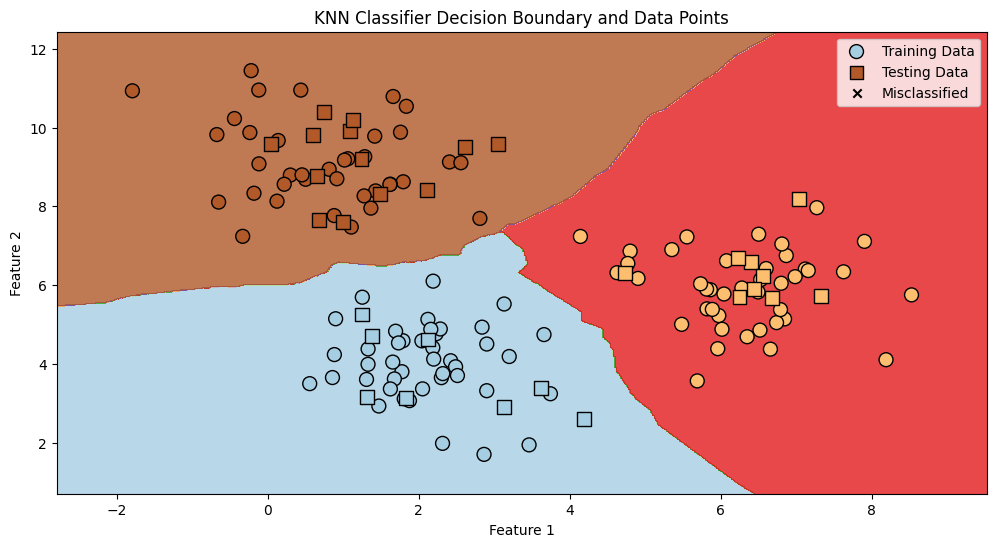

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating a synthetic dataset
centers = [[2, 4], [6, 6], [1, 9]]  # Locations of the blobs (3 classes)
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, centers=np.array(centers), random_state=1)

# Using a split of 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=50)

# The printing of the sizes of the datasets used for training and testing
print("Training dataset size:", len(X_train))
print("Testing dataset size:", len(X_test))

# Using k equal to 5, carry out a KNN analysis on the simulated data
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Forecasting test results
y_predict = knn.predict(X_test)

# Score for output accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

# Create a mesh grid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(12, 6))

# Plot the decision boundary using a color map
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot the original data points (training data)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired, label="Training Data")

# Plot the testing data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', s=100, cmap=plt.cm.Paired, label="Testing Data")

# Highlight misclassified points
plt.scatter(X_test[y_predict != y_test][:, 0], X_test[y_predict != y_test][:, 1], c='black', marker='x', label='Misclassified')

# Set titles and labels
plt.title('KNN Classifier Decision Boundary and Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()
